# 1. Data Exploration [20 points]

## 1.1 Load & transform the Twitter emoji dataset [11 points]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pip install scikit-learn
import sklearn as sk

#import and ignore warnings
import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.


In [2]:
# open the 'food_drink_emoji_tweets' file with pythonic methods
file = open('HW1/itemsets-data/food_drink_emoji_tweets.txt', 'r',
            encoding='utf-8')
file_contents = file.read()
file.close()
file_contents = file_contents.split('\n')

In [3]:
# convert it to dataframe
tweet_df = pd.DataFrame(file_contents, columns=['tweet_text'])
tweet_df.tail()

,tweet_text
9996,"RT @Thabang92416252: ""@PinexAndApplex: 🍍🍏 @Emt..."
9997,@nuttysteph84 Steph!! 😭😭 🥓☕️🍳🤦🏼‍♂️❤️x
9998,I'm heading to a wedding. Weekend session afoo...
9999,Bubbles time 🍾🥂😍 https://t.co/7UTbBRlVeb
10000,


In [4]:
emoji_file = pd.read_csv('HW1/itemsets-data/food-drink-list.txt',
                         delimiter='\'', header=None)
# drop every odd column
emoji_file = emoji_file.drop(emoji_file.columns[0::2], axis=1)
# reindex columns
emoji_df = emoji_file.T
index = np.arange(0,len(emoji_df))
emoji_df = emoji_df.set_index(index)
emoji_df.columns = ['emoji']
emoji_df

,emoji
0,🍫
1,🍡
2,🍏
3,🍈
4,🍯
...,...
100,🍜
101,🍓
102,🦑
103,🍩


In [5]:
# use regex to remove all ascii characters
# also remove spaces
import re
def remove_ascii(text):
    return re.sub(r'[\x00-\x7F]+',' ', text)
def remove_space(text):
    return re.sub(r' ','', text)
def add_space(text):
    return ' '.join(text)
def make_unique(text):
    return np.unique(text)

tweet_df['emoji'] = tweet_df['tweet_text'].apply(remove_ascii).\
    apply(remove_space).apply(add_space).str.split().apply(make_unique)
# drop last row
tweet_df = tweet_df.drop(tweet_df.index[len(tweet_df)-1])
tweet_df.tail(3)

,tweet_text,emoji
9997,@nuttysteph84 Steph!! 😭😭 🥓☕️🍳🤦🏼‍♂️❤️x,"[‍, ☕, ♂, ❤, ️, 🍳, 🏼, 😭, 🤦, 🥓]"
9998,I'm heading to a wedding. Weekend session afoo...,"[🍷, 🍹, 🍻, 🎉, 💒]"
9999,Bubbles time 🍾🥂😍 https://t.co/7UTbBRlVeb,"[🍾, 😍, 🥂]"


In [6]:
# remove emojis that are not in the emoji list
def remove_non_emoji(text):
    return [x for x in text if x in emoji_df['emoji'].tolist()]
tweet_df['emoji'] = tweet_df['emoji'].apply(remove_non_emoji)
tweet_df.head(10)
# findx

,tweet_text,emoji
0,RT @CalorieFixess: 🍗🌯🍔🍒 400 Calories https://t...,"[🌯, 🍒, 🍔, 🍗]"
1,RT @1_F_I_R_S_T: _ 🍈¹〉Grow your account fast! ...,"[🍇, 🍈, 🍉, 🍊, 🍍, 🍓]"
2,RT @LegendDeols: 👉👉👉G€T Ready to dance💃🕺🕺🕺💃💃💃 ...,"[🍸, 🥃]"
3,@britch_x Hubby's friend bought us Wendy's-che...,"[🍔, 🍟]"
4,RT @DAILYPUPPlES: Workout partner ☕🍌😍 https://...,"[☕, 🍌]"
5,RT @Yggdrasillrealm: congrats fam!! #1 shanawa...,"[🍾, 🥂]"
6,@martinmozotegui 🎒🐝⛪️🐁🐘 🍦 🕷🍆1️⃣⭐️🍋🐝 es yogur h...,"[🍆, 🍋, 🍦]"
7,RT @Tangerine2525: FOLLOW EVERYONE WHO LIKES T...,"[🍇, 🍊]"
8,RT @sweetrosepetal: @YaOnlyLivvOnce Me EVERY d...,"[🍦, 🍧, 🍨, 🍩, 🍪, 🍫, 🍰, 🎂]"
9,RT @NAQI5110: 🥘Bam Bam Bam🥘 🍲Lets Gain Followe...,"[🍛, 🍲, 🥗, 🥘]"


In [7]:
# use MultiLabelBinarizer to create a binary matrix
# use emoji_df to get the columns

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit(emoji_df['emoji'])
mlb.classes_
mlb.transform(tweet_df['emoji'])
emoji_matrix = pd.DataFrame(mlb.transform(tweet_df['emoji']),
                            columns=mlb.classes_)
emoji_matrix.tail()

,☕,🌭,🌮,🌯,🌰,🌶,🌽,🍄,🍅,🍆,...,🥭,🥮,🥯,🦀,🦐,🦑,🦞,🧀,🧁,🧂
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1.2 Exploratory Data Analysis (EDA) [9 points]

In [8]:
# How many different emojis are there?
len(mlb.classes_)

105

In [9]:
# How many emojis are used on an average per tweet?
emoji_matrix.sum(axis=1).mean().__round__(2)

2.63

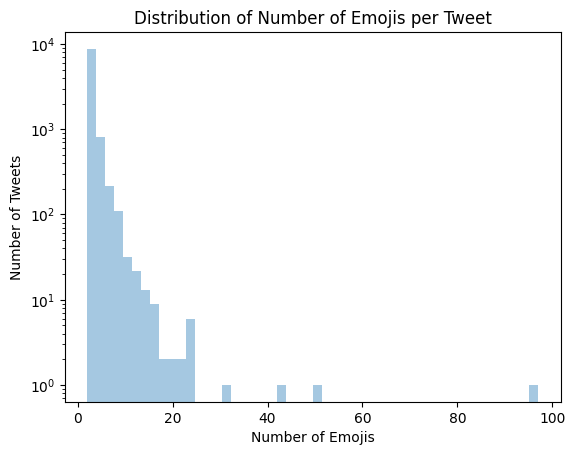

In [10]:
# plot the distribution of the number of emojis per tweet
# in log scale using seaborn
sns.distplot(emoji_matrix.sum(axis=1), kde=False)
plt.yscale('log')
plt.xlabel('Number of Emojis')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Number of Emojis per Tweet')
plt.show()

In [11]:
# top 5 emojis
emoji_matrix.sum().sort_values(ascending=False).head()

🍻    1819
🎂    1486
🍔    1384
🍾    1082
🥂    1031
dtype: int64

# 2. The Apriori Algorithm [45 points]

In [12]:
%pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


### a) [10 points] Using apriori, create a function, `emoji_frequent_itemsets`

In [13]:
# Using apriori, create a function, `emoji_frequent_itemsets`, to find all the frequent
# k-itemsets with a minimal support of `min_support` in the emoji dataset. I
# recommend using the `mlxtend` library for this. Your function should return a
# dataframe with the frequent itemsets and their corresponding support.
# Also add a parameter for 'min_len' to specify the minimum length of the itemsets.
# Sort in descending order by support.

from mlxtend.frequent_patterns import apriori
def emoji_frequent_itemsets(df, min_support, min_len):
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True, max_len=None)
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    frequent_itemsets = frequent_itemsets[frequent_itemsets['length'] >= min_len]
    frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
    return frequent_itemsets

# Find all the frequent itemsets with a minimal support of 0.02.
frequent_itemsets = emoji_frequent_itemsets(emoji_matrix, 0.02, 2)
frequent_itemsets

c:\Users\prathuj\OneDrive - Umich\@SI671\671_Lab_code\.venv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
38,0.0815,"(🍔, 🍻)",2
44,0.0570,"(🥂, 🍾)",2
40,0.0459,"(🎂, 🍰)",2
42,0.0427,"(🍺, 🍻)",2
36,0.0365,"(🍑, 🍆)",2
37,0.0320,"(🍔, 🍟)",2
43,0.0311,"(🍾, 🎂)",2
45,0.0243,"(🥂, 🎂)",2
41,0.0232,"(🍸, 🍹)",2
39,0.0228,"(🍭, 🍬)",2


### b) [5 points] Using this function, find all frequent 3-itemsets with a min support of 0.007

In [14]:
# Find all the frequent 3-itemsets with a minimal support of 0.007.
frequent_itemsets = emoji_frequent_itemsets(emoji_matrix, 0.007, 3)
frequent_itemsets

c:\Users\prathuj\OneDrive - Umich\@SI671\671_Lab_code\.venv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
158,0.0117,"(🍹, 🍸, 🍷)",3
170,0.0104,"(🥂, 🍾, 🎂)",3
156,0.0092,"(🍔, 🍕, 🍟)",3
155,0.0079,"(🍊, 🍉, 🍇)",3
169,0.0079,"(🥂, 🍸, 🍹)",3
163,0.0077,"(🍹, 🍻, 🍷)",3
160,0.0076,"(🍸, 🍻, 🍷)",3
165,0.0076,"(🥂, 🍾, 🍷)",3
166,0.0076,"(🍺, 🍸, 🍹)",3
159,0.0075,"(🍺, 🍸, 🍷)",3


In [15]:
frequent_itemsets.shape

(16, 3)

## 2.1 Apriori Algorithm under the Hood [30 points]

### 2.1.1 Candidate Generation

#### a) [10 points] Generate candidate 3-itemsets

In [16]:
# import food_emoji_frequent_2_itemsets.csv
# the file does not have headers, so you will need to add them

food_emoji_freq_itemsets = pd.read_csv(
    'HW1/itemsets-data/food_emoji_frequent_2_itemsets.csv', header=None)
food_emoji_freq_itemsets.columns = ['itemsets']
food_emoji_freq_itemsets.head()

,itemsets
0,🌭🍔
1,🌭🍕
2,🍔🌮
3,🍕🌮
4,🍆🍑


In [17]:
# construct a `generate_candidate_3_itemsets` function, which
# takes in a list of frequent 2-itemsets and returns a list of the candidate 3-itemsets 
# ("candidate" means that they may or may not be frequent). 

def generate_candidate_3_itemsets(frequent_2_itemsets):
    candidate_3_itemsets = []

    for i in range(len(frequent_2_itemsets)):
        for j in range(i + 1, len(frequent_2_itemsets)):
            itemset1 = frequent_2_itemsets[i]
            itemset2 = frequent_2_itemsets[j]

            # Check if the first (k-1) items are the same
            if len(set(itemset1).intersection(set(itemset2))) == len(itemset1) - 1:
                # Join the two itemsets to create a candidate 3-itemset
                candidate_3_itemset = set(itemset1).union(set(itemset2))
                candidate_3_itemsets.append(candidate_3_itemset)

    return candidate_3_itemsets

In [18]:
# save the candidate 3-itemsets to a csv file called `food_emoji_candidate_3_itemsets.csv`
# the file should have no index column and no headers

candidate_3_itemsets = generate_candidate_3_itemsets(
    food_emoji_freq_itemsets['itemsets'])
candidate_3_itemsets_df = pd.DataFrame(candidate_3_itemsets)
candidate_3_itemsets_df.to_csv(
    'HW1/itemsets-data/food_emoji_candidate_3_itemsets.csv',
    index=False, header=False)

In [19]:
candidate_3_itemsets_df.tail()

,0,1,2
457,🎂,🍭,🍬
458,🎂,🍬,🍰
459,🎂,🍭,🍰
460,🎂,🍭,🍰
461,🎂,🍭,🍰


#### b) [10 points] Prune the candidate 3-itemsets

In [20]:
# Apply the function to each row in the DataFrame and create a new column
def string_to_emoji_set(s):
    return set(s)

food_emoji_freq_itemsets['EmojiSet']\
    = food_emoji_freq_itemsets.itemsets.apply(
        lambda x: string_to_emoji_set(x))

In [21]:
from itertools import combinations


def has_infrequent_subset(candidate, frequent_2_itemsets):
    # Generate all 2-item subsets of the candidate
    subsets = [set(x) for x in combinations(candidate, 2)]

    # Check if any 2-item subset is not in the frequent 2-itemsets
    for subset in subsets:
        if subset not in frequent_2_itemsets:
            return True
    return False

# Prune the candidate 3-itemsets
candidate_3_itemsets_pruned = [itemset for itemset in candidate_3_itemsets if\
                        not has_infrequent_subset(
                            itemset, food_emoji_freq_itemsets.EmojiSet.to_list())]


In [22]:
candidate_3_itemsets_unique = []
for i in candidate_3_itemsets_pruned:
    if i not in candidate_3_itemsets_unique:
        candidate_3_itemsets_unique.append(i)
candidate_3_itemsets_unique_df = pd.DataFrame(candidate_3_itemsets_unique)
candidate_3_itemsets_unique_df.to_csv(
    'HW1/itemsets-data/candidate_3_itemsets_unique.csv', index=False, header=False)
candidate_3_itemsets_unique_df.tail(8)

,0,1,2
80,🎂,🍫,🍬
81,🍫,🍭,🍰
82,🎂,🍫,🍭
83,🎂,🍫,🍰
84,🍭,🍬,🍰
85,🎂,🍭,🍬
86,🎂,🍬,🍰
87,🎂,🍭,🍰


### 2.1.2 Database Scan [10 points] 

In [23]:
emoji_database = pd.DataFrame(tweet_df['emoji'])
emoji_database['emoji'] = emoji_database['emoji'].apply(string_to_emoji_set)
print(emoji_database.shape)
emoji_database.tail()

(10000, 1)


,emoji
9995,"{🍻, 🥃}"
9996,"{🍍, 🍏}"
9997,"{🥓, ☕, 🍳}"
9998,"{🍹, 🍻, 🍷}"
9999,"{🥂, 🍾}"


In [24]:
# scan the database (in our case, you can scan the `emoji_matrix` created above
# in 1.1c) and count the occurrence of each candidate itemset

def count_occurrences(candidate_itemsets, df):
    # Create a dictionary to store the counts for each candidate
    counts = {}

    # Iterate over the candidate itemsets
    for candidate in candidate_itemsets:
        # print('candidate: ', candidate)
        # Iterate over the rows in the DataFrame
        for index, row in df.iterrows():
            # Check if the candidate is a subset of the row
            if candidate.issubset(row['emoji']):
                # Increment the count of the candidate by 1
                if frozenset(candidate) in counts.keys():
                    counts[frozenset(candidate)] += 1
                else:
                    counts[frozenset(candidate)] = 1
                 
    return counts

In [25]:
# construct a new function, `calculate_frequent_itemsets`, where the input
# argument_1 = (`candidate_itemsets`) is a list of the candidate 3-itemsets from the previous section
# argument_2 = `min_support` 
# function should return a complete list of frequent 3-itemsets with a minimal support

def calculate_frequent_itemsets(candidate_itemsets, min_support):
    # Count the occurrences of each candidate
    counts = count_occurrences(candidate_itemsets, emoji_database)

    # Create a DataFrame from the dictionary of candidate counts
    candidate_counts = pd.DataFrame.from_dict(counts, orient='index')
    candidate_counts = candidate_counts.reset_index()
    candidate_counts.columns = ['itemsets', 'support']

    # Divide the support by the number of rows in the database
    candidate_counts['support'] = candidate_counts['support'] / len(emoji_database)

    # sort the DataFrame by support descending
    candidate_counts = candidate_counts.sort_values(by='support', ascending=False)

    # save the frequent itemsets to a csv file called `food_emoji_frequent_3_itemsets.csv`
    pd.DataFrame(candidate_counts).to_csv(
        'HW1/itemsets-data/food_emoji_frequent_3_itemsets.csv', index=False)

    # Filter the DataFrame to only contain the frequent itemsets
    frequent_itemsets = candidate_counts[candidate_counts['support'] >= min_support]
    return frequent_itemsets


In [26]:
# takes about 15 seconds to run
calculate_frequent_itemsets(candidate_3_itemsets_unique, 0.005)

,itemsets,support
47,"(🍔, 🍕, 🍟)",0.0092
2,"(🍊, 🍉, 🍇)",0.0079
78,"(🍫, 🍭, 🍬)",0.0070
51,"(🍨, 🍦, 🍧)",0.0069
19,"(🍍, 🍊, 🍉)",0.0069
3,"(🍍, 🍉, 🍇)",0.0064
7,"(🍉, 🥝, 🍇)",0.0061
23,"(🍊, 🥝, 🍉)",0.0061
11,"(🍊, 🥝, 🍇)",0.0060
8,"(🍍, 🍊, 🍇)",0.0059


# 3. Evaluating Frequent Itemsets [25 points]

In [27]:
# apply the apriori function to 'emoji_matrix' created in section 1.1c with a
# min_support of 0.005 and use_colnames = True.

frequent_itemsets_hash = apriori(emoji_matrix, min_support=0.005, use_colnames=True)
frequent_itemsets_hash

c:\Users\prathuj\OneDrive - Umich\@SI671\671_Lab_code\.venv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.0589,(☕)
1,0.0193,(🌭)
2,0.0186,(🌮)
3,0.0086,(🌯)
4,0.0053,(🌰)
...,...,...
258,0.0057,"(🍹, 🍺, 🍸, 🍷)"
259,0.0061,"(🍹, 🍸, 🍻, 🍷)"
260,0.0056,"(🍹, 🍸, 🥂, 🍷)"
261,0.0050,"(🍺, 🍸, 🍻, 🍷)"


## a) [10 points]

In [28]:
# apply the association_rules function to the result with metric = "lift" and min_threshold = 3
# (meaning to only return values where lift is equal to or greater than 3).
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets_hash, metric="lift", min_threshold=3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(☕),(🍩),0.0589,0.0312,0.0084,0.142615,4.570981,0.006562,1.129947,0.830123
1,(🍩),(☕),0.0312,0.0589,0.0084,0.269231,4.570981,0.006562,1.287821,0.806388
2,(🌭),(🍔),0.0193,0.1384,0.0113,0.585492,4.230435,0.008629,2.078610,0.778646
3,(🍔),(🌭),0.1384,0.0193,0.0113,0.081647,4.230435,0.008629,1.067890,0.886279
4,(🌭),(🍕),0.0193,0.0441,0.0050,0.259067,5.874543,0.004149,1.290131,0.846104
...,...,...,...,...,...,...,...,...,...,...
507,"(🍻, 🍹)","(🍺, 🍸)",0.0162,0.0127,0.0051,0.314815,24.788568,0.004894,1.440924,0.975461
508,(🍺),"(🍸, 🍻, 🍹)",0.0799,0.0075,0.0051,0.063830,8.510638,0.004501,1.060170,0.959135
509,(🍸),"(🍺, 🍻, 🍹)",0.0518,0.0065,0.0051,0.098456,15.147015,0.004763,1.101998,0.985004
510,(🍻),"(🍺, 🍸, 🍹)",0.1819,0.0076,0.0051,0.028037,3.689129,0.003718,1.021027,0.891008


## b) [10 points]

In [29]:
#  construct a function, ‘mi’, that uses the three support values ((1) antecedent support, (2)
# consequent support and (3) support) to compute the mutual information

def mi(antecedent_support, consequent_support, support):
    A_1 = antecedent_support
    B_1 = consequent_support
    A_0 = 1 - antecedent_support
    B_0 = 1 - consequent_support
    A_1_B_1 = support
    A_1_B_0 = A_1 - A_1_B_1
    A_0_B_1 = B_1 - A_1_B_1
    A_0_B_0 = 1 - A_1_B_1 - A_1_B_0 - A_0_B_1

    if((A_1_B_1 == 0)| (A_1_B_0 == 0) | (A_0_B_1 == 0) | (A_0_B_0 == 0)):
        print('Warning: one of the values is 0')

    sum = 0

    if (A_1_B_1 > 0):
        sum += A_1_B_1 * np.log2(A_1_B_1 / (A_1 * B_1))
    if (A_1_B_0 > 0):
        sum += A_1_B_0 * np.log2(A_1_B_0 / (A_1 * B_0))
    if (A_0_B_1 > 0):
        sum += A_0_B_1 * np.log2(A_0_B_1 / (A_0 * B_1))
    if (A_0_B_0 > 0):
        sum += A_0_B_0 * np.log2(A_0_B_0 / (A_0 * B_0))

    return sum


## c) [5 points] 

In [30]:
# apply function to rules using apply for rowise operations

rules['MI'] = rules.apply(lambda x: mi(x['antecedent support'],
                                         x['consequent support'], x['support']), axis=1)
rules.sort_values('MI', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,MI
8,(🍑),(🍆),0.0702,0.0507,0.0365,0.519943,10.255286,0.032941,1.977474,0.970627,0.113247
9,(🍆),(🍑),0.0507,0.0702,0.0365,0.719921,10.255286,0.032941,3.319779,0.950689,0.113247
131,(🍾),(🥂),0.1082,0.1031,0.0570,0.526802,5.109624,0.045845,1.895402,0.901874,0.108986
130,(🥂),(🍾),0.1031,0.1082,0.0570,0.552861,5.109624,0.045845,1.994459,0.896745,0.108986
74,(🍔),(🍻),0.1384,0.1819,0.0815,0.588873,3.237344,0.056325,1.989895,0.802118,0.101562


# 4. Itemset Similarity [10 points]

## 4.1 Jaccard Similarity


### a) [5 points] 

In [31]:
# Complete a function, ‘jaccard_similarity’, to calculate the Jaccard similarity
# between two sets

def jaccard_similarity(set1, set2):
    return len(set1.intersection(set2)) / len(set1.union(set2))

### b) [5 points] 

In [32]:
# apply the function to any tweet_df['emoji'] in the dataset and return the top 5 most similar tweets
# (based on Jaccard similarity) to the input tweet

def find_similar_tweets(tweet, df): #, n=5
    # print('Tweet:', frozenset(tweet))
    # Calculate the Jaccard similarity between the tweet and all other tweets
    similarities = df['emoji'].apply(
        lambda x: jaccard_similarity(frozenset(tweet), frozenset(x)))

    # Sort by descending similarity
    similarities = similarities.sort_values(ascending=False)

    # Return the top n most similar tweets
    return similarities #.iloc[1:n+1]

In [33]:
# store in a dataframe along with the Jaccard similarity score
tweet_index = 0
similar_tweets = pd.DataFrame(
    find_similar_tweets(tweet_df['emoji'][tweet_index], tweet_df))
# similar_tweets

In [34]:
# store in a list the top 5 most similar tweets
text_list = []
emoji_list = []
for k in range(5):
    text_list.append(
        tweet_df.iloc[find_similar_tweets(tweet_df['emoji'][tweet_index], tweet_df).index[k]]['tweet_text'])
    emoji_list.append(
        tweet_df.iloc[find_similar_tweets(tweet_df['emoji'][tweet_index], tweet_df).index[k]]['emoji'])
# findx

In [35]:
compare_df = similar_tweets[0:5]
# rename columns
compare_df.columns = ['similarity']
compare_df['tweet_text'] = text_list
compare_df['emojis'] = emoji_list
pd.set_option('display.max_colwidth', None)
compare_df

,similarity,tweet_text,emojis
0,1.00,RT @CalorieFixess: 🍗🌯🍔🍒 400 Calories https://t.co/9OaPOWUSht,"[🌯, 🍒, 🍔, 🍗]"
6800,0.75,RT @levelscafeabuja: Chow! 🤩💦🍗🌯🍔 #LevelsCafeAbuja https://t.co/r9YvzPNFpi,"[🌯, 🍔, 🍗]"
5334,0.50,RT @thatssochioma: You don’t want to miss this 😎 come and chop 🍗 🍔 and come by our table! Win-win 😉 #MAPSTTU #TTU22 #EtaUpAlphas #B2SBBQ2k1…,"[🍔, 🍗]"
3466,0.50,@jewishmuseummd @americanart I'm definitely in! I bet we can find some lovely landscape locations for a picnic. 🧺🍒🍗… https://t.co/LDldrNNkBb,"[🍒, 🍗]"
7877,0.50,@tafarireid07 Did you say bbq? 🔥🍔🍗🚙,"[🍔, 🍗]"
